
# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This is an analysis of the TMDb  movie data set. This data set contains information of 10,866 movies collected from TMDb data base. This data set includes columns containing original title, vote average, budget, revenue, popularity scores, release date, cast and 13 other observations

### Question(s) for Analysis
1. What are the properties of the dataset?
2. What year has the highest movie releases?
3. What movies have the highest and lowest revenue in terms of 2010 dollar value?
4. What movies have the highest and lowest budget in terms of 2010 dollar value?
5. What movies have the highest and lowest profit in terms of 2010 dollar value?
6. What properties are associated with movies that have high revenues ?
7. What genres have the highest and lowest count in the dataset?
8. What is the average popularity of each genre from year to year?
9. How is the average runtime affected year to year?

In [1]:
#import statements for all of the packages that you plan to use 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#find out the shape of the data set
df.shape

(10866, 21)

In [4]:
#get an insight about the data set so you can know how to handle it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#drop columns that would not be needed for the analysis
df.drop(['tagline', 'overview','imdb_id','director','homepage', 'keywords','production_companies', 'cast'], axis=1, inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I dropped the columns that I would not be using for this analysis based on the questions for analysis stated in the introduction

In [6]:
#find the number of duplicated values in the data set
df.duplicated().sum()

1

In [7]:
#find duplicated id column
df[df['id'].duplicated()]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
#confirm that there are actually duplicate rows for the movie Tekken
df[df['original_title']== 'TEKKEN']

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
#confirm one row has actually been dropped
df.shape

(10865, 13)


### Data Cleaning
> 
 

In [11]:
#find out which columns have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   runtime         10865 non-null  int64  
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
 11  budget_adj      10865 non-null  float64
 12  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


In [12]:
#find out the number of null values in the genres column
df.genres.isnull().sum()

23

In [13]:
#drop all rows where the genre is null
df.dropna(inplace=True)

In [14]:
#confirm that all null values have been dropped. Would return false if no null value exist in the dataset
df.isnull().any()

id                False
popularity        False
budget            False
revenue           False
original_title    False
runtime           False
genres            False
release_date      False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10842 non-null  int64  
 1   popularity      10842 non-null  float64
 2   budget          10842 non-null  int64  
 3   revenue         10842 non-null  int64  
 4   original_title  10842 non-null  object 
 5   runtime         10842 non-null  int64  
 6   genres          10842 non-null  object 
 7   release_date    10842 non-null  object 
 8   vote_count      10842 non-null  int64  
 9   vote_average    10842 non-null  float64
 10  release_year    10842 non-null  int64  
 11  budget_adj      10842 non-null  float64
 12  revenue_adj     10842 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


In [16]:
#change the release_date column from a string to date time format
df['release_date'] = pd.to_datetime(df['release_date']) 

In [17]:
#confirm that all the columns are the correct data type
df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [18]:
#get summary of data set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The median for both the revenue and budget columns was 0.While it is possible to produce movies with little to zero budget, it is very unlikely. After additional investigation, I found out that some of the movies with 0 budget in the dataset actually had a budget. Searching and including the budgets of over 4000 movies would have been too difficult and very prone to errors, so I decided to drop them from the analysis

In [19]:
# drop all rows with and adjusted budget of 0
df = df.drop(index = df[df['budget_adj']== 0].index)
df.shape

(5168, 13)

Decided to drop the rows with an adjusted revenue of zero for the same reason as the budget, it would have been too difficult to find and input the correct values for each movie

In [20]:
#drop all rows with adjusted revenue of 0
df = df.drop(index = df[df['revenue_adj']== 0].index)
df.shape

(3854, 13)

In [21]:
# get summary data set 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 What are the properties of the dataset?)

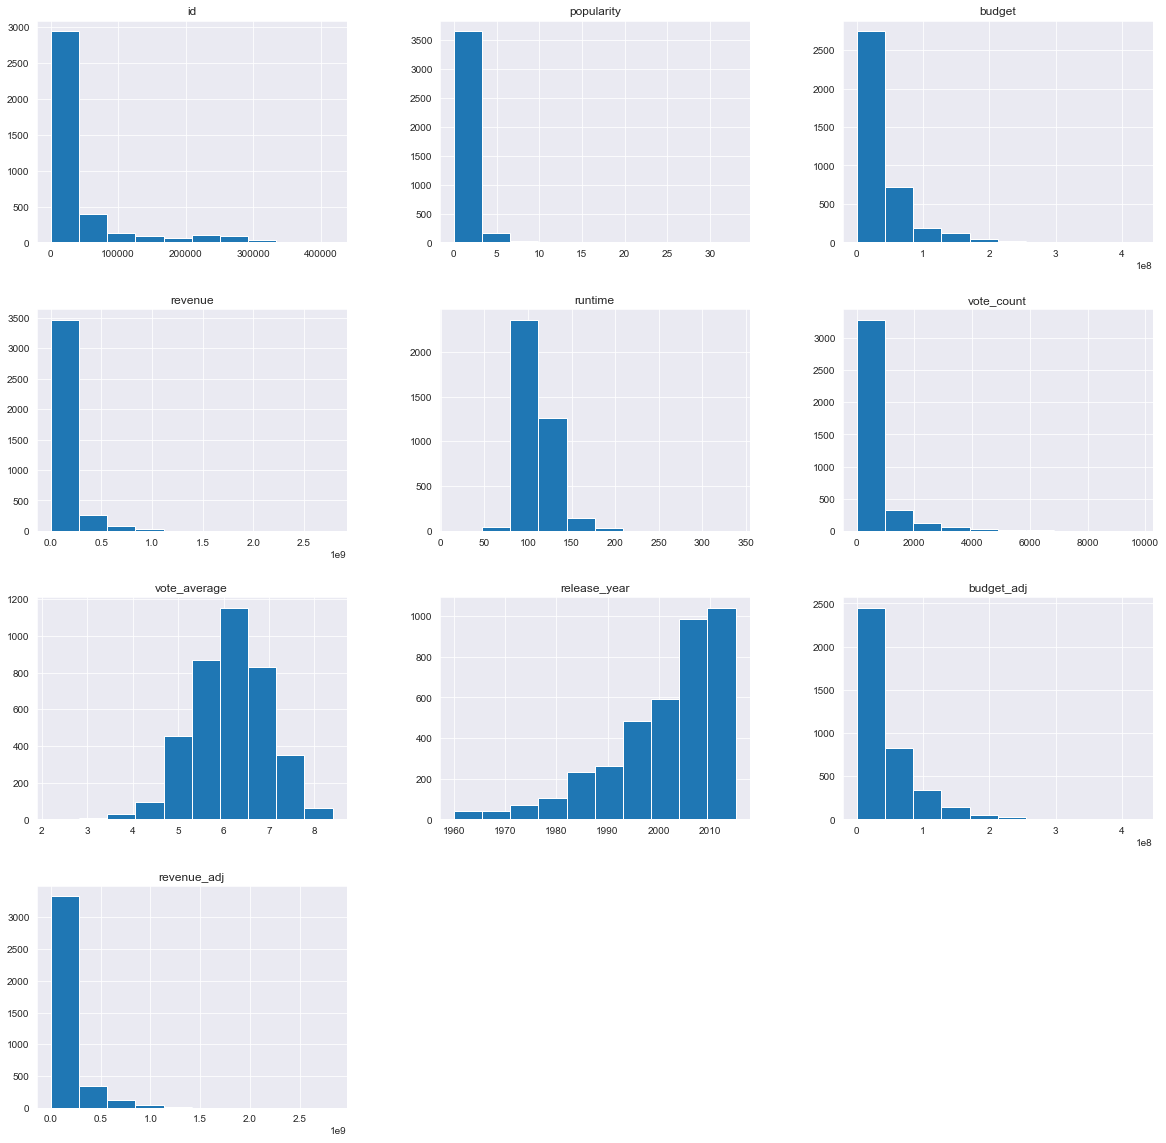

In [22]:
#find the major features of the distribution
df.hist(figsize = (20,20));


It can be noticed that majority of movies in the dataset have a runtime between 75 minutes and 100 minutes, most movies vote average is between 6 and 6.5 and a vast majority of the movies in this data set have a release year between 2005 and 2015

### Research Question 2  (What year has the highest movie releases?)

Text(0, 0.5, 'Number of Movies')

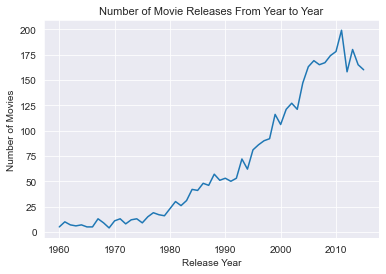

In [23]:
#use the group by function to group the movie count by the release year
df.groupby('release_year').count()['original_title'].plot(kind='line')
plt.title('Number of Movie Releases From Year to Year', fontsize = 11)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')

From the graph we can see that the year with the highest movie release is 2011

### Research Question 3  (What movies have the highest and lowest revenue in terms of 2010 dollar value?)

#### Since I would be doing this repeatedly in my analysis I decided to create a FUNCTION that would give the index of the max and min values of specified columns

In [24]:
#create a function that gives you the max and min value for each variable
def index_minmax(x):
    index_max = df[df[x]==df[x].max() ].index
    index_min = df[df[x]==df[x].min() ].index
    return index_max, index_min 
    

In [25]:
#find the index for the movies that had the highest and lowest revenues
index_minmax('revenue_adj')

(Int64Index([1386], dtype='int64'), Int64Index([5067], dtype='int64'))

In [26]:
#find out the movies with the highest and lowest revenues
print('The movie with the highest revenue is : ' , df.loc[1386,:]['original_title'])
print('The movie with the lowest revenue is : ' ,df.loc[5067,:]['original_title'])

The movie with the highest revenue is :  Avatar
The movie with the lowest revenue is :  Shattered Glass


### Research Question 4  (What movies have the highest and lowest budget in terms of 2010 dollar value?)

In [27]:
#use the function created to find the index for the movies that had the highest and lowest budgets

index_minmax('budget_adj')

(Int64Index([2244], dtype='int64'), Int64Index([3581], dtype='int64'))

In [28]:
#used the index to find out the movies that had the highest and lowest budgets
print('The movie with the highest budget is : ' , df.loc[2244,:]['original_title'])
print('The movie with the lowest budget is : ' ,df.loc[3581,:]['original_title'])

The movie with the highest budget is :  The Warrior's Way
The movie with the lowest budget is :  Love, Wedding, Marriage


### Research Question 5  (What movies have the highest and lowest profit in terms of 2010 dollar value?)

In [29]:
#calculate profit for each row in the dataset and assign the values to a new column called profit
df['profit'] = df['revenue_adj'] - df['budget_adj'] 

In [30]:
#use the function created to find the index for the movies that had the highest and lowest profit
index_minmax('profit')

(Int64Index([1329], dtype='int64'), Int64Index([2244], dtype='int64'))

In [31]:
print('The movie with the highest profit is : ' , df.loc[1329,:]['original_title'])
print('The movie with the lowest profit is : ' ,df.loc[2244,:]['original_title'])

The movie with the highest profit is :  Star Wars
The movie with the lowest profit is :  The Warrior's Way


### Research Question 6 (  What of properties are asociated with movies that have high revenues ?

In [32]:
#find the median adjusted revenue and used that to split the data set into two
#movies with revenues below the median were classed as low revenue movies
#movies with revenues above the median were classed as high revenue movies
median = df['revenue_adj'].median()
low_revenue = df.query('revenue_adj < {}'.format(median))
high_revenue = df.query('revenue_adj >= {}'.format(median))

In [33]:
# create a function to avoid repetitive code
def rev_lowhigh(x):
    mean_low = low_revenue[x]. mean()
    mean_high = high_revenue[x].mean()
    a = [1, 2]
    b = [mean_low, mean_high]
    labels = ['Low_revenue', 'High_revenue']
    return plt.bar(a, b, tick_label=labels, color = ('blue', 'blue'))
  

Created a function that plots the average of columns x, for movies that fall under low or high revenue categories

Text(0, 0.5, 'Mean Vote Average ')

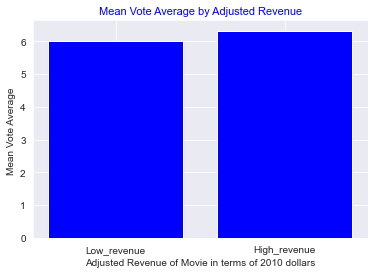

In [34]:
#create a bar graph to show the mean vote average for movies that fall under low and high revenue categories
rev_lowhigh('vote_average')
plt.title('Mean Vote Average by Adjusted Revenue', fontsize = 11, color = 'blue')
plt.xlabel('Adjusted Revenue of Movie in terms of 2010 dollars')
plt.ylabel('Mean Vote Average ')

The analysis indicates that movies regarded as low revenue movies have a vote average of about 6.01 and movies with higher revenues have a vote average of about 6.3

Text(0, 0.5, 'Average Popularity ')

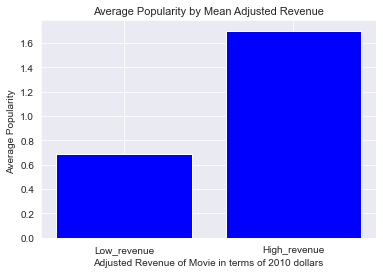

In [35]:
rev_lowhigh('popularity')
plt.title('Average Popularity by Mean Adjusted Revenue', fontsize=11)
plt.xlabel('Adjusted Revenue of Movie in terms of 2010 dollars')
plt.ylabel('Average Popularity ')

The analysis reveals that the popularity of movies categorized as high revenue is almost 3 times that of low revenue movies 

Text(0, 0.5, 'Average runtime')

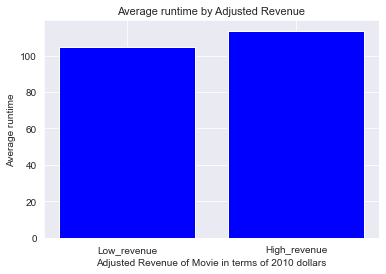

In [36]:
rev_lowhigh('runtime')
plt.title('Average runtime by Adjusted Revenue', fontsize=11)
plt.xlabel('Adjusted Revenue of Movie in terms of 2010 dollars')
plt.ylabel('Average runtime')

The plot shows that the average run time of movies under the high revenue category is slightly higher than the run time of movies in the low revenue category

Text(0, 0.5, 'Average Adjusted Budget')

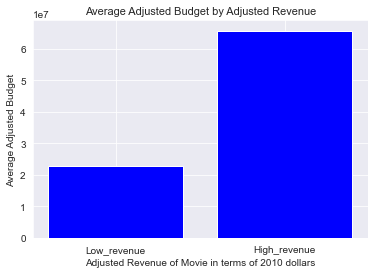

In [37]:
rev_lowhigh('budget_adj')
plt.title('Average Adjusted Budget by Adjusted Revenue', fontsize=11)
plt.xlabel('Adjusted Revenue of Movie in terms of 2010 dollars')
plt.ylabel('Average Adjusted Budget')

The plot shows that the budget for movies under the high revenue category is significantly higher than movies under the low revenue category

### Research Question 7 (  What genres have the highest and lowest count in the dataset?)

In [38]:
#split the genres column so that the genres of movies that fall into more than one category can be seperated into a list
df['genres'] = df['genres'].str.split("|")

In [39]:
#transform each genre that is a list to a row
genres_split = df.explode('genres', ignore_index=False)
genres_split.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


I used the pandas explode function to transform each movie with a list of genres into rows accounting for each genre on the list. This was done so I could get an accurate count of the movies classified under each genre

In [40]:
#get an array of the unique genres in the dataset
genres_split['genres'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

Text(0, 0.5, 'Genres')

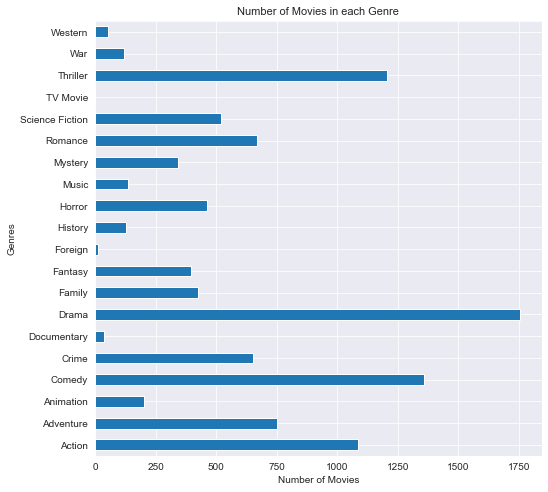

In [41]:
#split the data set by genres to get the number of movies that fall under each category
genres_split.groupby('genres').count()['original_title'].plot(kind = 'barh', figsize= (8,8));
plt.title('Number of Movies in each Genre', fontsize=11)
plt.xlabel('Number of Movies')
plt.ylabel('Genres')

The genre with the highest number of movie in the data set is drama with about 1750 movies and the genre with the lowest is Tv movie with zero

Text(0.5, 1.0, 'Percentage of Movies in the dataset in each genre')

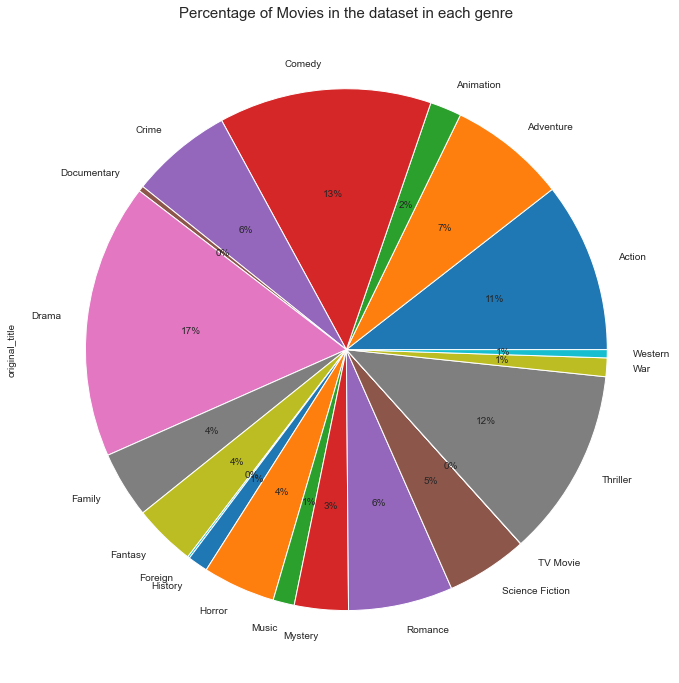

In [44]:
#get a visual representation of the percentage of movies that fall under each genre
genres_split.groupby('genres').count()['original_title'].plot(kind = 'pie', figsize= (12,12), autopct='%.0f%%');
plt.title('Percentage of Movies in the dataset in each genre', fontsize = 15)

The pie chart shows that drama is the genre with the  maximum proportion of movies in the data set iwith about 17% and genres with the lowest proportions are Tv movie, foreign and documentary with approximately 0%

### Research Question 8 (  What is the average popularity of each genre from year to year?)

In [45]:
#group the data set by the genres and release year and find the average popularity of each group
df_p = genres_split.groupby(['genres', 'release_year']).agg('popularity').mean()
print(df_p)

genres   release_year
Action   1960            1.504538
         1961            0.464139
         1962            1.848380
         1963            1.357698
         1964            3.153791
                           ...   
Western  2011            1.569683
         2012            5.944518
         2013            0.801051
         2014            0.870104
         2015            7.504550
Name: popularity, Length: 842, dtype: float64


I grouped the dataset by the genre and release year so that we could get the average popularity of movies in each genre and we can see how this popularity has been affected through the years

<AxesSubplot:xlabel='release_year'>

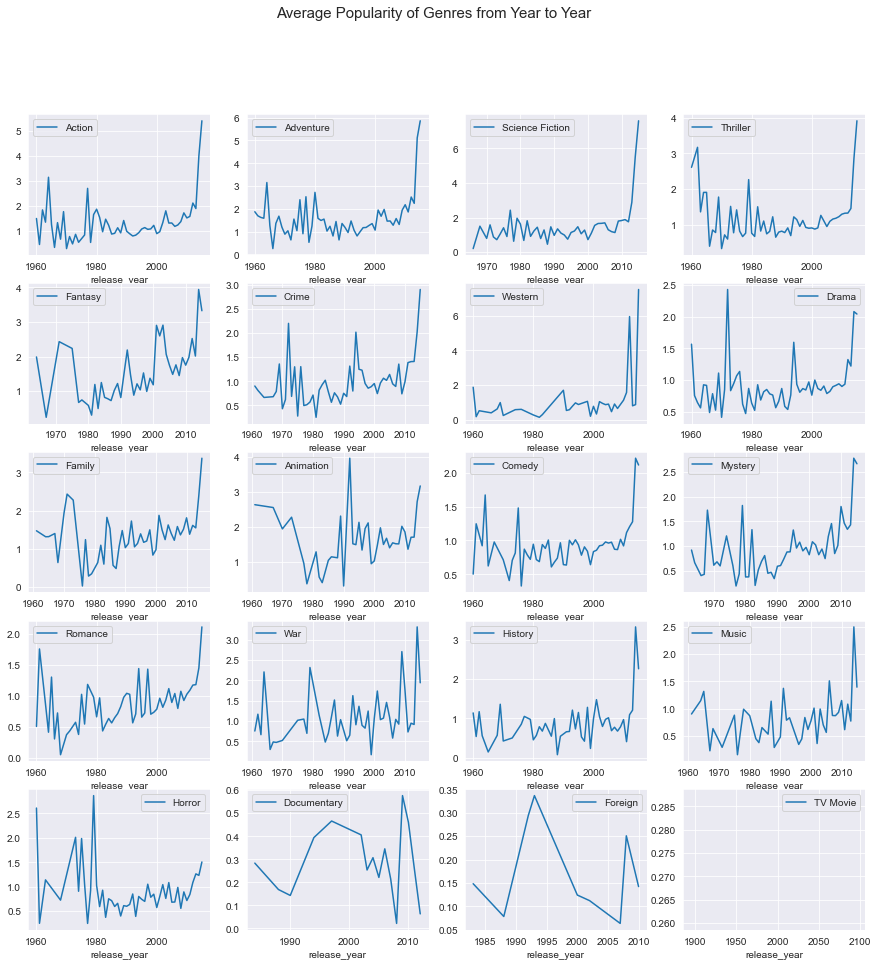

In [46]:
#make subplot for each genre to show how the average popularity has been affected from year to year
fig, ax = plt.subplots(5,4, figsize=(15,15))
fig.suptitle('Average Popularity of Genres from Year to Year', fontsize = 15)
df_p['Action'].plot(kind ='line', label='Action', ax=ax[0][0], legend=True)
df_p['Adventure'].plot(kind ='line', label='Adventure', ax=ax[0][1], legend=True)
df_p['Science Fiction'].plot(kind ='line', label='Science Fiction', ax=ax[0][2], legend=True)
df_p['Thriller'].plot(kind ='line', label='Thriller', ax=ax[0][3], legend=True)
df_p['Fantasy'].plot(kind ='line', label='Fantasy', ax=ax[1][0], legend=True)
df_p['Crime'].plot(kind ='line', label='Crime', ax=ax[1][1], legend=True)
df_p['Western'].plot(kind ='line', label='Western', ax=ax[1][2], legend=True)
df_p['Drama'].plot(kind ='line', label='Drama', ax=ax[1][3], legend=True)
df_p['Family'].plot(kind ='line', label='Family', ax=ax[2][0], legend=True)
df_p['Animation'].plot(kind ='line', label='Animation', ax=ax[2][1], legend=True)
df_p['Comedy'].plot(kind ='line', label='Comedy', ax=ax[2][2], legend=True)
df_p['Mystery'].plot(kind ='line', label='Mystery', ax=ax[2][3], legend=True)
df_p['Romance'].plot(kind ='line', label='Romance', ax=ax[3][0], legend=True)
df_p['War'].plot(kind ='line', label='War', ax=ax[3][1], legend=True)
df_p['History'].plot(kind ='line', label='History', ax=ax[3][2], legend=True)
df_p['Music'].plot(kind ='line', label='Music', ax=ax[3][3], legend=True)
df_p['Horror'].plot(kind ='line', label='Horror', ax=ax[4][0], legend=True)
df_p['Documentary'].plot(kind ='line', label='Documentary', ax=ax[4][1], legend=True)
df_p['Foreign'].plot(kind ='line', label='Foreign', ax=ax[4][2], legend=True)
df_p['TV Movie'].plot(kind ='line', label='TV Movie', ax=ax[4][3], legend=True)

Most genres in the dataset have their highest popularity between 2010 and 2015 except drama with it's highest popularity at about 1970, animation at about 1991, horror at about 1979, documentary at about 2009 and foreign at about 1993.

### Research Question 9 ( How is the average runtime affected year to year?)

Text(0, 0.5, 'Average Runtime')

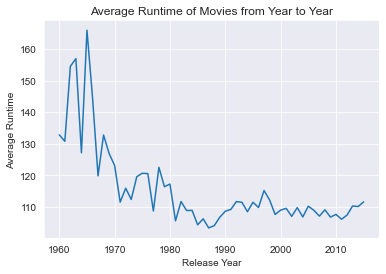

In [47]:
#group the dataset by the release year and find the average runtime for each year
df_r = genres_split.groupby('release_year').agg('runtime').mean().plot(kind = 'line')
plt.title('Average Runtime of Movies from Year to Year', fontsize = 12)
plt.xlabel('Release Year')
plt.ylabel('Average Runtime')

From the analysis, we can see that the average runtime of movies was highest at about 1965. Average run time of movies declined from 1965 to 1980 and have remained about the same up until 2015

<a id='conclusions'></a>
## Conclusions

1. It can be noticed that majority of movies in the dataset have a runtime between 75 minutes and 100 minutes, most movies vote average is between 6 and 6.5 and a vast majority of the movies in this data set have a release year between 2005 and 2015.
2. The year 2011 has the highest movie releases.

3. The movie with the highest revenue is Avatar while the movie with the lowest revenue is Shattered Glass.
4. The movie with the highest budget is The Warrior's Way while the movie with the lowest budget is Love, Wedding, Marriage.
5. The movie with the highest profit is Star War while the movie with the lowest profit is The Warrior's Way.
6. High revenue movies have significantly higher budgets and higher popularity than lower revenue movies and slightly higher vote average and runtime and lower revenue movies.
7. The top three genres are Drama, Comedy and Thriller with 17%, 13% and 12% respectively and the bottom three genres are TV Movie,Foreign and Documentary with appproximately 0% for all three.
8. Most genres in the dataset have their highest popularity between 2010 and 2015 except drama with it's highest popularity at about 1970, animation at about 1991, horror at about 1979, documentary at about 2009 and foreign at about 1993.
9. There seems to a decline in the average runtime of movies from 1965 to 1980 and then the runtime stayed at about the same average from 1980 to 2015.

## Limitations
1. Splitting the genres column separated by | into list increased the amount of time it took to perform the analysis.
2. While there might be a correllation between the popularity of movies and the revenue generation, enough analysis was not done to prove the popularity of a movie caused the revenue to be high or vice versa.




